In [59]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

In [60]:
species_id =116  # 70 boomklever, 116 halsbandparkiet

## Data exploring

In [61]:
file_observations = f'../1_scraping/scraped_data/cleaned/observation_details_{species_id}_clean.csv'

# Load the data
df_observations = pd.read_csv(file_observations, header=0, index_col="observation_id")

# Preview
df_observations.head(5)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method
observation_id,,,,,,,,,,,,,,,,,
336301369,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8585, 4.6717",33m,iObs,2024-12-31 16:45,1,onbekend,ter plaatse,30919.0,Heverlee - Egenhoven - Egenhoven Bos (VB),40236.0,Frederik Fluyt,onbekend,onbekend
336233189,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8044, 4.6010",30m,Showcase,2024-12-31 16:00,1,onbekend,ter plaatse,30976.0,Loonbeek - Korenheide (VB),3528.0,Externe bron,geen,onbekend
336205268,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8584, 4.2921",3m,ObsMapp,2024-12-31 15:29,6,onbekend,foeragerend,32596.0,Berchem-Ste-Agathe/St-Agatha-Berchem - Koninck...,72841.0,Sara Velghe,onbekend,gezien en gehoord
336194978,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.9315, 4.3675",13m,ObsIdentify,2024-12-31 15:21,1,onbekend,ter plaatse,23260.0,Grimbergen (VB),359678.0,Kristof Vynckier,geen,onbekend
336193018,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.7396, 3.3351",14m,Site,2024-12-31 14:57,4,onbekend,ter plaatse,27358.0,Kooigem (WV),201247.0,Lore Vander Plancken,geen,gezien


In [62]:
df_observations.index

Index([336301369, 336233189, 336205268, 336194978, 336193018, 336289624,
       336284264, 336284263, 336284262, 336204005,
       ...
       233647277, 233647261, 233644993,  98988761, 145469911,  50541272,
       203905722,  50531480, 142655244, 233392391],
      dtype='int64', name='observation_id', length=96950)

In [63]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96950 entries, 336301369 to 233392391
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   species_id               96950 non-null  float64
 1   species_name             96950 non-null  object 
 2   species_name_scientific  96950 non-null  object 
 3   validation               96950 non-null  object 
 4   gps_coordinates          96551 non-null  object 
 5   accuracy                 96493 non-null  object 
 6   source                   92767 non-null  object 
 7   date                     96950 non-null  object 
 8   amount                   96950 non-null  object 
 9   life_stage               96575 non-null  object 
 10  activity                 96575 non-null  object 
 11  location_id              96092 non-null  float64
 12  location                 96092 non-null  object 
 13  observer_id              96793 non-null  float64
 14  observer_name  

In [64]:
df_observations.describe(include='all')

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method
count,96950.0,96950,96950,96950,96551,96493,92767,96950,96950,96575,96575,96092.000000,96092,9.679300e+04,96793,96950,96950
unique,NaN,1,1,5,63817,378,26,63867,556,19,44,NaN,3090,NaN,6037,7,15
top,NaN,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"51.0509, 4.3699",10m,Site,2022-11-15,1,onbekend,ter plaatse,NaN,Willebroek (AN),NaN,Wim Van den Bossche,onbekend,onbekend
freq,NaN,96950,96950,57686,961,24830,46331,34,46089,88135,56295,NaN,7041,NaN,14471,79414,60871
mean,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60541.305551,NaN,8.840309e+04,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101529.453801,NaN,1.131419e+05,NaN,NaN,NaN
min,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23088.000000,NaN,1.850000e+02,NaN,NaN,NaN
25%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24033.000000,NaN,4.042000e+04,NaN,NaN,NaN
50%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29069.000000,NaN,4.645600e+04,NaN,NaN,NaN
75%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41806.000000,NaN,9.408200e+04,NaN,NaN,NaN


## Cleaning

In [65]:
df_observations_cleaned = df_observations.copy()

### Gps Coördinaten
Bij het ingeven van een observatie op waarnemingen.be kan je ervoor kiezen om geen coördinaten mee te geven. Dit is vooral interessant als het zeldzame soorten betreft en de bescherming belangrijker wordt geacht dan open data.</br>
Hoewel zowel de halsbandparkiet als de boomklever zijn veel voorkomende soorten zijn, zijn er toch nog waarnemingen waar de gps-coördinaten niet meegegeven worden. 
Vermits deze coördinaten crucial zijn in onze oefening, verwijderen we deze observaties uit onze dataset. </br>

De latitude (Noorderbreedte) en longitude (oosterlengte) worden als aparte kolom meegegeven.

In [66]:
# print observations with gps coördinates
df_observations_cleaned[df_observations_cleaned['gps_coordinates'].notnull()].head(5)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method
observation_id,,,,,,,,,,,,,,,,,
336301369,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8585, 4.6717",33m,iObs,2024-12-31 16:45,1,onbekend,ter plaatse,30919.0,Heverlee - Egenhoven - Egenhoven Bos (VB),40236.0,Frederik Fluyt,onbekend,onbekend
336233189,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8044, 4.6010",30m,Showcase,2024-12-31 16:00,1,onbekend,ter plaatse,30976.0,Loonbeek - Korenheide (VB),3528.0,Externe bron,geen,onbekend
336205268,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8584, 4.2921",3m,ObsMapp,2024-12-31 15:29,6,onbekend,foeragerend,32596.0,Berchem-Ste-Agathe/St-Agatha-Berchem - Koninck...,72841.0,Sara Velghe,onbekend,gezien en gehoord
336194978,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.9315, 4.3675",13m,ObsIdentify,2024-12-31 15:21,1,onbekend,ter plaatse,23260.0,Grimbergen (VB),359678.0,Kristof Vynckier,geen,onbekend
336193018,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.7396, 3.3351",14m,Site,2024-12-31 14:57,4,onbekend,ter plaatse,27358.0,Kooigem (WV),201247.0,Lore Vander Plancken,geen,gezien


In [67]:
# print observations with missing gps coördinates
df_observations_cleaned[df_observations_cleaned['gps_coordinates'].isnull()].head(5)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method
observation_id,,,,,,,,,,,,,,,,,
336112156,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (met bewijs),NaN,NaN,ObsMapp,2024-12-29,1,onbekend,ter plaatse,23347.0,Edegem (AN),60682.0,Koen Maes,onbekend,onbekend
336045294,116.0,Halsbandparkiet,Psittacula krameri,Onbekend,NaN,NaN,Site,2024-12-28,1,onbekend,ter plaatse,24118.0,Lochristi (OV),774012.0,Christa v.,geen,onbekend
336080757,116.0,Halsbandparkiet,Psittacula krameri,Onbekend,NaN,NaN,Site,2024-12-28,4,adult,foeragerend,24095.0,Wervik (WV),813612.0,Eric V.,exact aantal,gezien en gehoord
336446917,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),NaN,NaN,ObsMapp,2024-12-25,7,onbekend,ter plaatse,41817.0,Ohain (BW),59339.0,Christophe Rousseau,onbekend,onbekend
335584574,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),NaN,NaN,ObsIdentify,2024-12-22,1,onbekend,ter plaatse,23234.0,Dworp (VB),260018.0,Deneyer,geen,onbekend


In [68]:
# drop observations with missing gps coördinates
df_observations_cleaned = df_observations_cleaned.dropna(subset = ['gps_coordinates']) 

In [69]:
df_observations_cleaned["latitude"] = df_observations_cleaned["gps_coordinates"].apply(lambda x: x.split(', ')[0]) # noorderbreedte
df_observations_cleaned["longitude"] = df_observations_cleaned["gps_coordinates"].apply(lambda x: x.split(', ')[1]) # oosterlengte

### Accuracy
Accuracy bestaat uit strings en floats. We willen de accuracy weergeven datatype float dat de meters weergeeft. De waarden 'onbekend' en NaN worden vervangen door NaN. </br>


In [70]:
df_observations_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96551 entries, 336301369 to 233392391
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   species_id               96551 non-null  float64
 1   species_name             96551 non-null  object 
 2   species_name_scientific  96551 non-null  object 
 3   validation               96551 non-null  object 
 4   gps_coordinates          96551 non-null  object 
 5   accuracy                 96493 non-null  object 
 6   source                   92386 non-null  object 
 7   date                     96551 non-null  object 
 8   amount                   96551 non-null  object 
 9   life_stage               96180 non-null  object 
 10  activity                 96180 non-null  object 
 11  location_id              95694 non-null  float64
 12  location                 95694 non-null  object 
 13  observer_id              96394 non-null  float64
 14  observer_name  

In [71]:
df_observations_cleaned[df_observations_cleaned["accuracy"].isnull()].count()

species_id                 58
species_name               58
species_name_scientific    58
validation                 58
gps_coordinates            58
accuracy                    0
source                     58
date                       58
amount                     58
life_stage                 56
activity                   56
location_id                58
location                   58
observer_id                58
observer_name              58
counting_method            58
method                     58
latitude                   58
longitude                  58
dtype: int64

In [72]:
df_observations_cleaned.groupby('accuracy').nunique().head(5)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,latitude,longitude
accuracy,,,,,,,,,,,,,,,,,,
1000m,1,1,1,5,253,4,587,30,3,18,161,161,173,173,5,7,227,243
100m,1,1,1,5,7805,11,6402,172,11,32,963,960,1044,1040,6,9,3044,3421
101m,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
103m,1,1,1,2,2,1,47,6,1,2,2,2,2,2,2,2,2,2
104m,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2


In [73]:
def extract_m_accuracy(x):
    if isinstance(x, str) and "m" in x:
        return float(re.findall(r'\d+', x)[0])
    else:
        return np.nan

# Extract and cast accuracy from string to float, handling NaN values
df_observations_cleaned["accuracy_m"] = df_observations_cleaned["accuracy"].apply(lambda x: extract_m_accuracy(x))

In [74]:
df_observations_cleaned[df_observations_cleaned["accuracy_m"].isnull()].head(5)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,latitude,longitude,accuracy_m
observation_id,,,,,,,,,,,,,,,,,,,,
336184496,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (met bewijs),"51.1525, 4.1613",onbekend,ObsIdentify,2024-12-31 12:50,1,onbekend,ter plaatse,28435.0,Sint-Niklaas - Zuid (OV),744150.0,LaurensDS,geen,onbekend,51.1525,4.1613,NaN
336134700,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (met bewijs),"51.1618, 4.6787",onbekend,ObsIdentify,2024-12-30 13:54,1,onbekend,ter plaatse,28659.0,Nijlen - Centrum (AN),356129.0,Walter,geen,onbekend,51.1618,4.6787,NaN
336083362,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"51.1730, 4.4420",NaN,ObsMapp,2024-12-29 08:59,1,onbekend,ter plaatse,134180.0,Wilrijk/Mortsel - Oude spoorwegberm (AN),1306.0,Marc Jeurissen,onbekend,onbekend,51.1730,4.4420,NaN
335983197,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (met bewijs),"51.1947, 4.4296",onbekend,Site,2024-12-28 10:18,1,onbekend,ter plaatse,84330.0,Berchem (A) - Wolvenberg (AN),327349.0,Joris Rombouts,geen,onbekend,51.1947,4.4296,NaN
335980033,116.0,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.4332, 4.2425",NaN,ObsMapp,2024-12-28 10:18,7,adult,foeragerend,42050.0,Carnières (HA),146409.0,Pirson Anne et Stéphane,exact aantal,op voederplaats,50.4332,4.2425,NaN


In [75]:
df_observations_cleaned["accuracy_m"].value_counts().sort_index(ascending=False)

accuracy_m
1407.0        3
1000.0      613
992.0         1
990.0       139
986.0         1
985.0         2
980.0         1
977.0         3
976.0         3
972.0         2
971.0        13
964.0         1
960.0         1
957.0         2
943.0         6
939.0         3
932.0         1
929.0         1
927.0         1
919.0         2
917.0         3
914.0         8
900.0         2
899.0         2
893.0         7
884.0         1
880.0         1
866.0         2
857.0         4
856.0         2
832.0         2
830.0         1
826.0         5
824.0        12
811.0         4
808.0         1
807.0         2
802.0         1
800.0         3
799.0         1
796.0         2
792.0         5
787.0         1
786.0         2
784.0         5
778.0         1
771.0         2
770.0        12
769.0         1
766.0         1
761.0         1
752.0         1
749.0         1
743.0         1
741.0         1
739.0         2
733.0         3
732.0         2
729.0         1
727.0         5
725.0         1
724.0        

In [76]:
df_observations_cleaned.drop(columns=['accuracy'], inplace=True)

### Datums

De datums worden in 2 formaten aangeleverd, datum met tijd (eg. 2024-05-24 10:12) en datum zonder tijd (eg. 2024-05-24). Vermits het tijdstip niet relevant is, wordt deze verwijderd uit de dataset. De data worden nadien nog eens geverifieerd op correcte omzetting door te verifieren dat elke dag van de maand ongeveer evenveel voorkomt. (Rekening houdend dat 29, 30 en 31e niet in elke maand bestaan)


In [77]:
df_observations_cleaned['date'].value_counts().sort_values(ascending=True) # check ook eens met False

date
2024-07-02 10:09     1
2024-07-09 16:33     1
2024-07-09 16:00     1
2024-07-09 15:52     1
2024-07-09 12:10     1
2024-07-09 10:45     1
2024-07-09 09:57     1
2024-07-09 09:01     1
2024-07-09 08:42     1
2024-07-09 08:01     1
2024-07-09 07:48     1
2024-07-09 06:50     1
2024-07-10 08:07     1
2024-07-02 18:41     1
2024-07-02 16:45     1
2024-07-02 10:22     1
2024-07-09 19:09     1
2024-07-02 10:08     1
2024-07-02 09:11     1
2024-07-02 08:56     1
2024-07-02 08:41     1
2024-07-02 08:30     1
2024-07-02 08:18     1
2024-07-02 07:52     1
2024-07-02 07:40     1
2024-07-01 19:50     1
2024-07-07 06:18     1
2024-07-01 16:53     1
2024-07-01 11:37     1
2024-07-01 09:15     1
2024-07-01 08:30     1
2024-07-01 08:17     1
2024-07-11 09:42     1
2024-07-07 15:30     1
2024-07-07 14:36     1
2024-07-07 14:13     1
2024-07-07 13:48     1
2024-07-07 12:06     1
2024-07-07 09:41     1
2024-07-07 09:30     1
2024-07-07 08:55     1
2024-07-07 08:08     1
2024-07-07 07:58     1
2024-0

In [78]:
df_observations_cleaned['date'] = pd.to_datetime(df_observations_cleaned['date'], format="mixed", errors='coerce').dt.normalize()

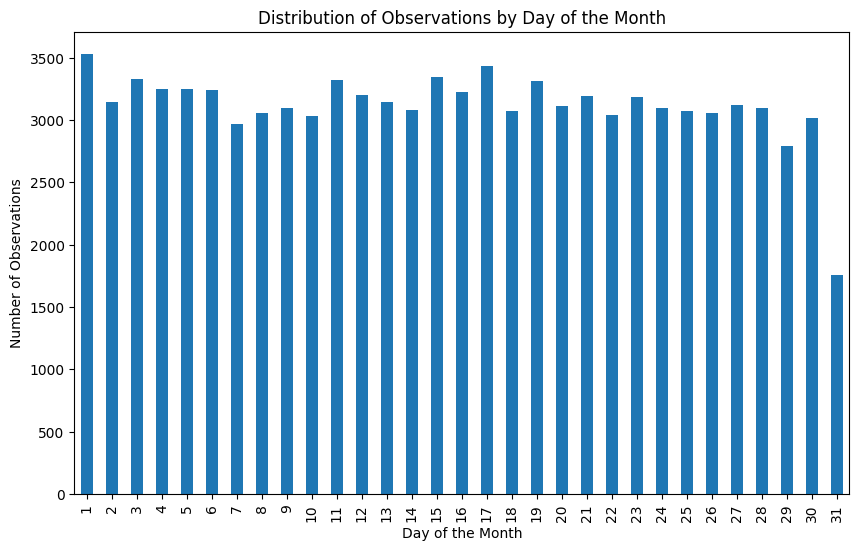

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_observations_cleaned['date'].dt.day.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Observations')
plt.title('Distribution of Observations by Day of the Month')
plt.show()

### Amount
Het 'amount' veld bevat naast het aantal waargenomen vogels, ook het gedrag. Dit nemen we echter niet mee in de oefening. We extraheren dus enkel het aantal waargenomen exemplaren.

In [80]:
df_observations_cleaned.groupby('amount').nunique().head(10)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,source,date,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,latitude,longitude,accuracy_m
amount,,,,,,,,,,,,,,,,,,
1,1,1,1,5,34082,26,6313,14,43,2706,2701,4493,4427,7,14,6933,9269,304
1\n \n \n\n\n\n\n\n \n\n\n adult in broedbiotoop,1,1,1,1,4,1,3,0,0,2,2,1,1,1,1,4,4,2
1\n \n \n\n\n\n\n\n \n\n\n baltsend / zingend\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n baltsend / zingend,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
1\n \n \n\n\n\n\n\n \n\n\n baltsend / zingend\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n ter plaatse,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
1\n \n \n\n\n\n\n\n \n\n\n baltsend paar (ook paring)\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n baltsend paar (ook paring),1,1,1,1,2,2,2,0,0,2,2,2,2,1,2,2,2,2
1\n \n \n\n\n\n\n\n \n\n\n bezet nest\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n bezet nest,1,1,1,2,2,1,2,0,0,2,2,2,2,2,2,2,2,1
1\n \n \n\n\n\n\n\n \n\n\n bezet nest\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n roepend,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
1\n \n \n\n\n\n\n\n \n\n\n foeragerend,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
1\n \n \n\n\n\n\n\n \n\n\n foeragerend\n \n \n 1\n \n \n\n\n\n\n\n \n\n\n foeragerend,1,1,1,4,8,2,8,0,0,7,7,7,7,3,3,8,8,5


In [81]:
df_observations_cleaned["amount"] = df_observations_cleaned["amount"].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int) # only keep the amount and cast as int

### Species_id 
We zetten de species_id om naar een integer

In [82]:
df_observations_cleaned["species_id"] = df_observations_cleaned["species_id"].astype(int) # int parsing

### Location_id en Location
Er zijn waarnemingen die wel gps-coördinaten bevatten, maar geen locatie_id en locatie beschikbaar hebben. Vermits we zullen werken met de gps-coördinaten mogen deze waarnemingen in de dataset blijven. De location_id zullen we niet parsen naar een integer, vermits we veel NaN waarden hebben en we deze willen behouden. Het datatype blijft een float.

In [83]:
df_no_location = df_observations_cleaned[df_observations_cleaned['location_id'].isnull() | df_observations_cleaned['location'].isnull()]
df_no_location.count()

species_id                 857
species_name               857
species_name_scientific    857
validation                 857
gps_coordinates            857
source                     716
date                       857
amount                     857
life_stage                 855
activity                   855
location_id                  0
location                     0
observer_id                700
observer_name              700
counting_method            857
method                     857
latitude                   857
longitude                  857
accuracy_m                 578
dtype: int64

## Final check and creation csv

In [84]:
df_observations_cleaned.sort_values('date', ascending=True).head(20)

,species_id,species_name,species_name_scientific,validation,gps_coordinates,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,latitude,longitude,accuracy_m
observation_id,,,,,,,,,,,,,,,,,,,
233392391,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (met bewijs),"50.7352, 3.7604",Site,1971-10-03,1,onbekend,foeragerend,43717.0,Flobecq (entité) (HA),44023.0,Marcel Moncousin,onbekend,onbekend,50.7352,3.7604,8.0
142655244,116,Halsbandparkiet,Psittacula krameri,Onbekend,"50.8801, 4.3012",Site,1972-01-08,2,onbekend,ter plaatse,142772.0,Ganshoren - Moeras van Ganshoren/Marais de Gan...,54195.0,Jean Rommes,onbekend,onbekend,50.8801,4.3012,100.0
50531480,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (aannemelijk),"50.8845, 4.3091",Site,1975-03-05,6,onbekend,ter plaatse,32610.0,Jette - Poelbos (BR),40234.0,Maurice Segers,onbekend,onbekend,50.8845,4.3091,NaN
203905722,116,Halsbandparkiet,Psittacula krameri,Onbekend,"50.8017, 4.6534",Site,1975-05-01,1,onbekend,ter plaatse,23380.0,Sint-Joris-Weert (VB),61541.0,Luk De Boer,onbekend,onbekend,50.8017,4.6534,10.0
50541272,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (aannemelijk),"50.8801, 4.3093",Site,1975-06-23,6,onbekend,ter plaatse,NaN,NaN,40234.0,Maurice Segers,onbekend,onbekend,50.8801,4.3093,NaN
145469911,116,Halsbandparkiet,Psittacula krameri,Onbekend,"50.8112, 4.6290",Site,1977-05-07,1,onbekend,ter plaatse,27767.0,Neerijse (VB),128756.0,Bob Hermans,onbekend,gehoord,50.8112,4.6290,NaN
98988761,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (aannemelijk),"50.8020, 5.6922",ingevoerd op kmhok niveau,1978-12-03,1,onbekend,ter plaatse,71841.0,Petit-Lanaye (LG),109938.0,Natuurbank Limburg,exact aantal,onbekend,50.8020,5.6922,500.0
233644993,116,Halsbandparkiet,Psittacula krameri,Onbekend,"50.7352, 3.7604",Site,1979-01-26,1,onbekend,ter plaatse,43717.0,Flobecq (entité) (HA),44023.0,Marcel Moncousin,onbekend,onbekend,50.7352,3.7604,8.0
233647261,116,Halsbandparkiet,Psittacula krameri,Onbekend,"50.7352, 3.7604",Site,1979-03-06,1,onbekend,ter plaatse,43717.0,Flobecq (entité) (HA),44023.0,Marcel Moncousin,onbekend,onbekend,50.7352,3.7604,25.0


In [85]:
df_observations_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96551 entries, 336301369 to 233392391
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   species_id               96551 non-null  int64         
 1   species_name             96551 non-null  object        
 2   species_name_scientific  96551 non-null  object        
 3   validation               96551 non-null  object        
 4   gps_coordinates          96551 non-null  object        
 5   source                   92386 non-null  object        
 6   date                     96551 non-null  datetime64[ns]
 7   amount                   96551 non-null  int64         
 8   life_stage               96180 non-null  object        
 9   activity                 96180 non-null  object        
 10  location_id              95694 non-null  float64       
 11  location                 95694 non-null  object        
 12  observer_id              

In [86]:
df_observations_cleaned.to_csv(f'./clean_data/observations_{species_id}_clean.csv', index=True)